In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
db = gpd.read_file("~/data/shared/sandiego_tracts.gpkg")

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [4]:
db.shape

(628, 25)

In [5]:
db.head()

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
0,06073018300,37.1,2590.0,2375.0,1299.0,2590.0,137.0,0.0,62500.0,0.5355,...,06,073,018300,2.876449,0.373913,0.052896,0.000000,0.916988,False,"POLYGON ((-13069450.120 3922380.770, -13069175..."
1,06073018601,41.2,5147.0,4069.0,1970.0,5147.0,562.0,24.0,88165.0,0.4265,...,06,073,018601,4.548797,0.205144,0.109190,0.004663,0.790558,False,"POLYGON ((-13067719.770 3922939.420, -13067631..."
2,06073017601,54.4,5595.0,4925.0,1702.0,5595.0,442.0,34.0,110804.0,0.4985,...,06,073,017601,8.726275,0.279029,0.078999,0.006077,0.880250,False,"POLYGON ((-13058166.110 3907247.690, -13058140..."
3,06073019301,42.3,7026.0,5625.0,3390.0,7026.0,638.0,46.0,100539.0,0.4003,...,06,073,019301,3.519743,0.196512,0.090806,0.006547,0.800598,False,"POLYGON ((-13056896.290 3925255.610, -13056868..."
4,06073018700,21.8,40402.0,30455.0,24143.0,40402.0,2456.0,23.0,41709.0,0.3196,...,06,073,018700,559.150793,0.949887,0.060789,0.000569,0.753799,False,"POLYGON ((-13090788.510 3946435.430, -13090736..."


In [6]:
db.columns

Index(['GEOID', 'median_age', 'total_pop', 'total_pop_white', 'tt_work',
       'hh_total', 'hh_female', 'total_bachelor', 'median_hh_income',
       'income_gini', 'total_housing_units', 'total_rented', 'median_no_rooms',
       'median_house_value', 'NAME', 'state', 'county', 'tract', 'area_sqm',
       'pct_rented', 'pct_hh_female', 'pct_bachelor', 'pct_white', 'sub_30',
       'geometry'],
      dtype='object')

<Axes: >

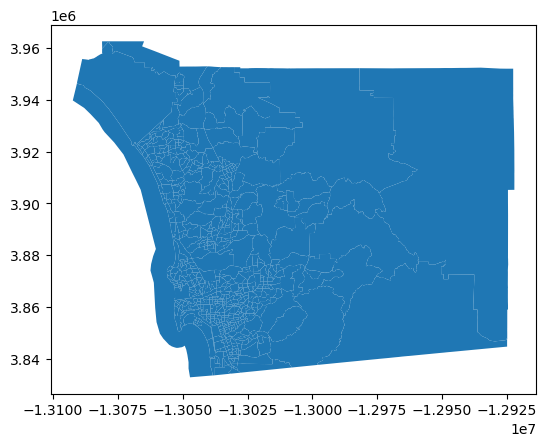

In [7]:
db.plot()

In [8]:
cluster_variables = [
    "median_house_value",
    "pct_white",
    "pct_rented",
    "pct_hh_female",
    "pct_bachelor",
    "median_no_rooms",
    "income_gini",
    "median_age",
    "tt_work"
]

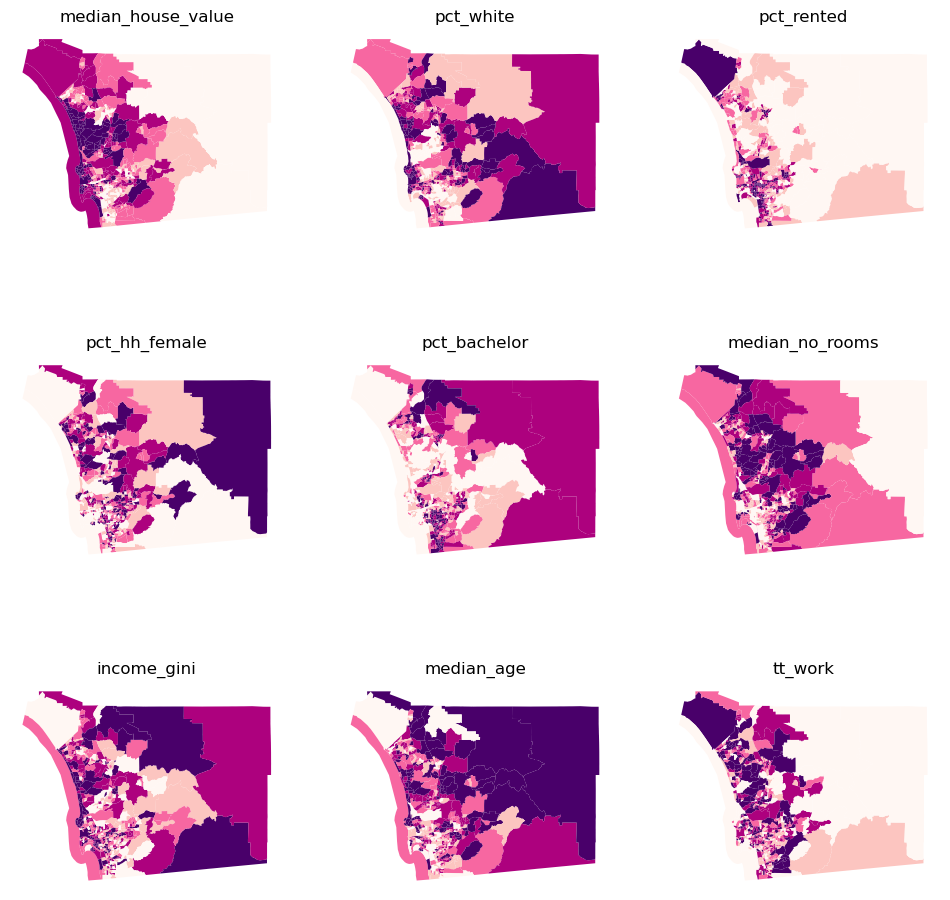

In [9]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
axs = axs.flatten()
for i, col in enumerate(cluster_variables):
    ax = axs[i]
    db.plot(column=col, ax=ax, scheme="Quantiles", linewidth=0, cmap='RdPu')
    ax.set_axis_off()
    ax.set_title(col)
plt.show()
    

In [10]:
import seaborn

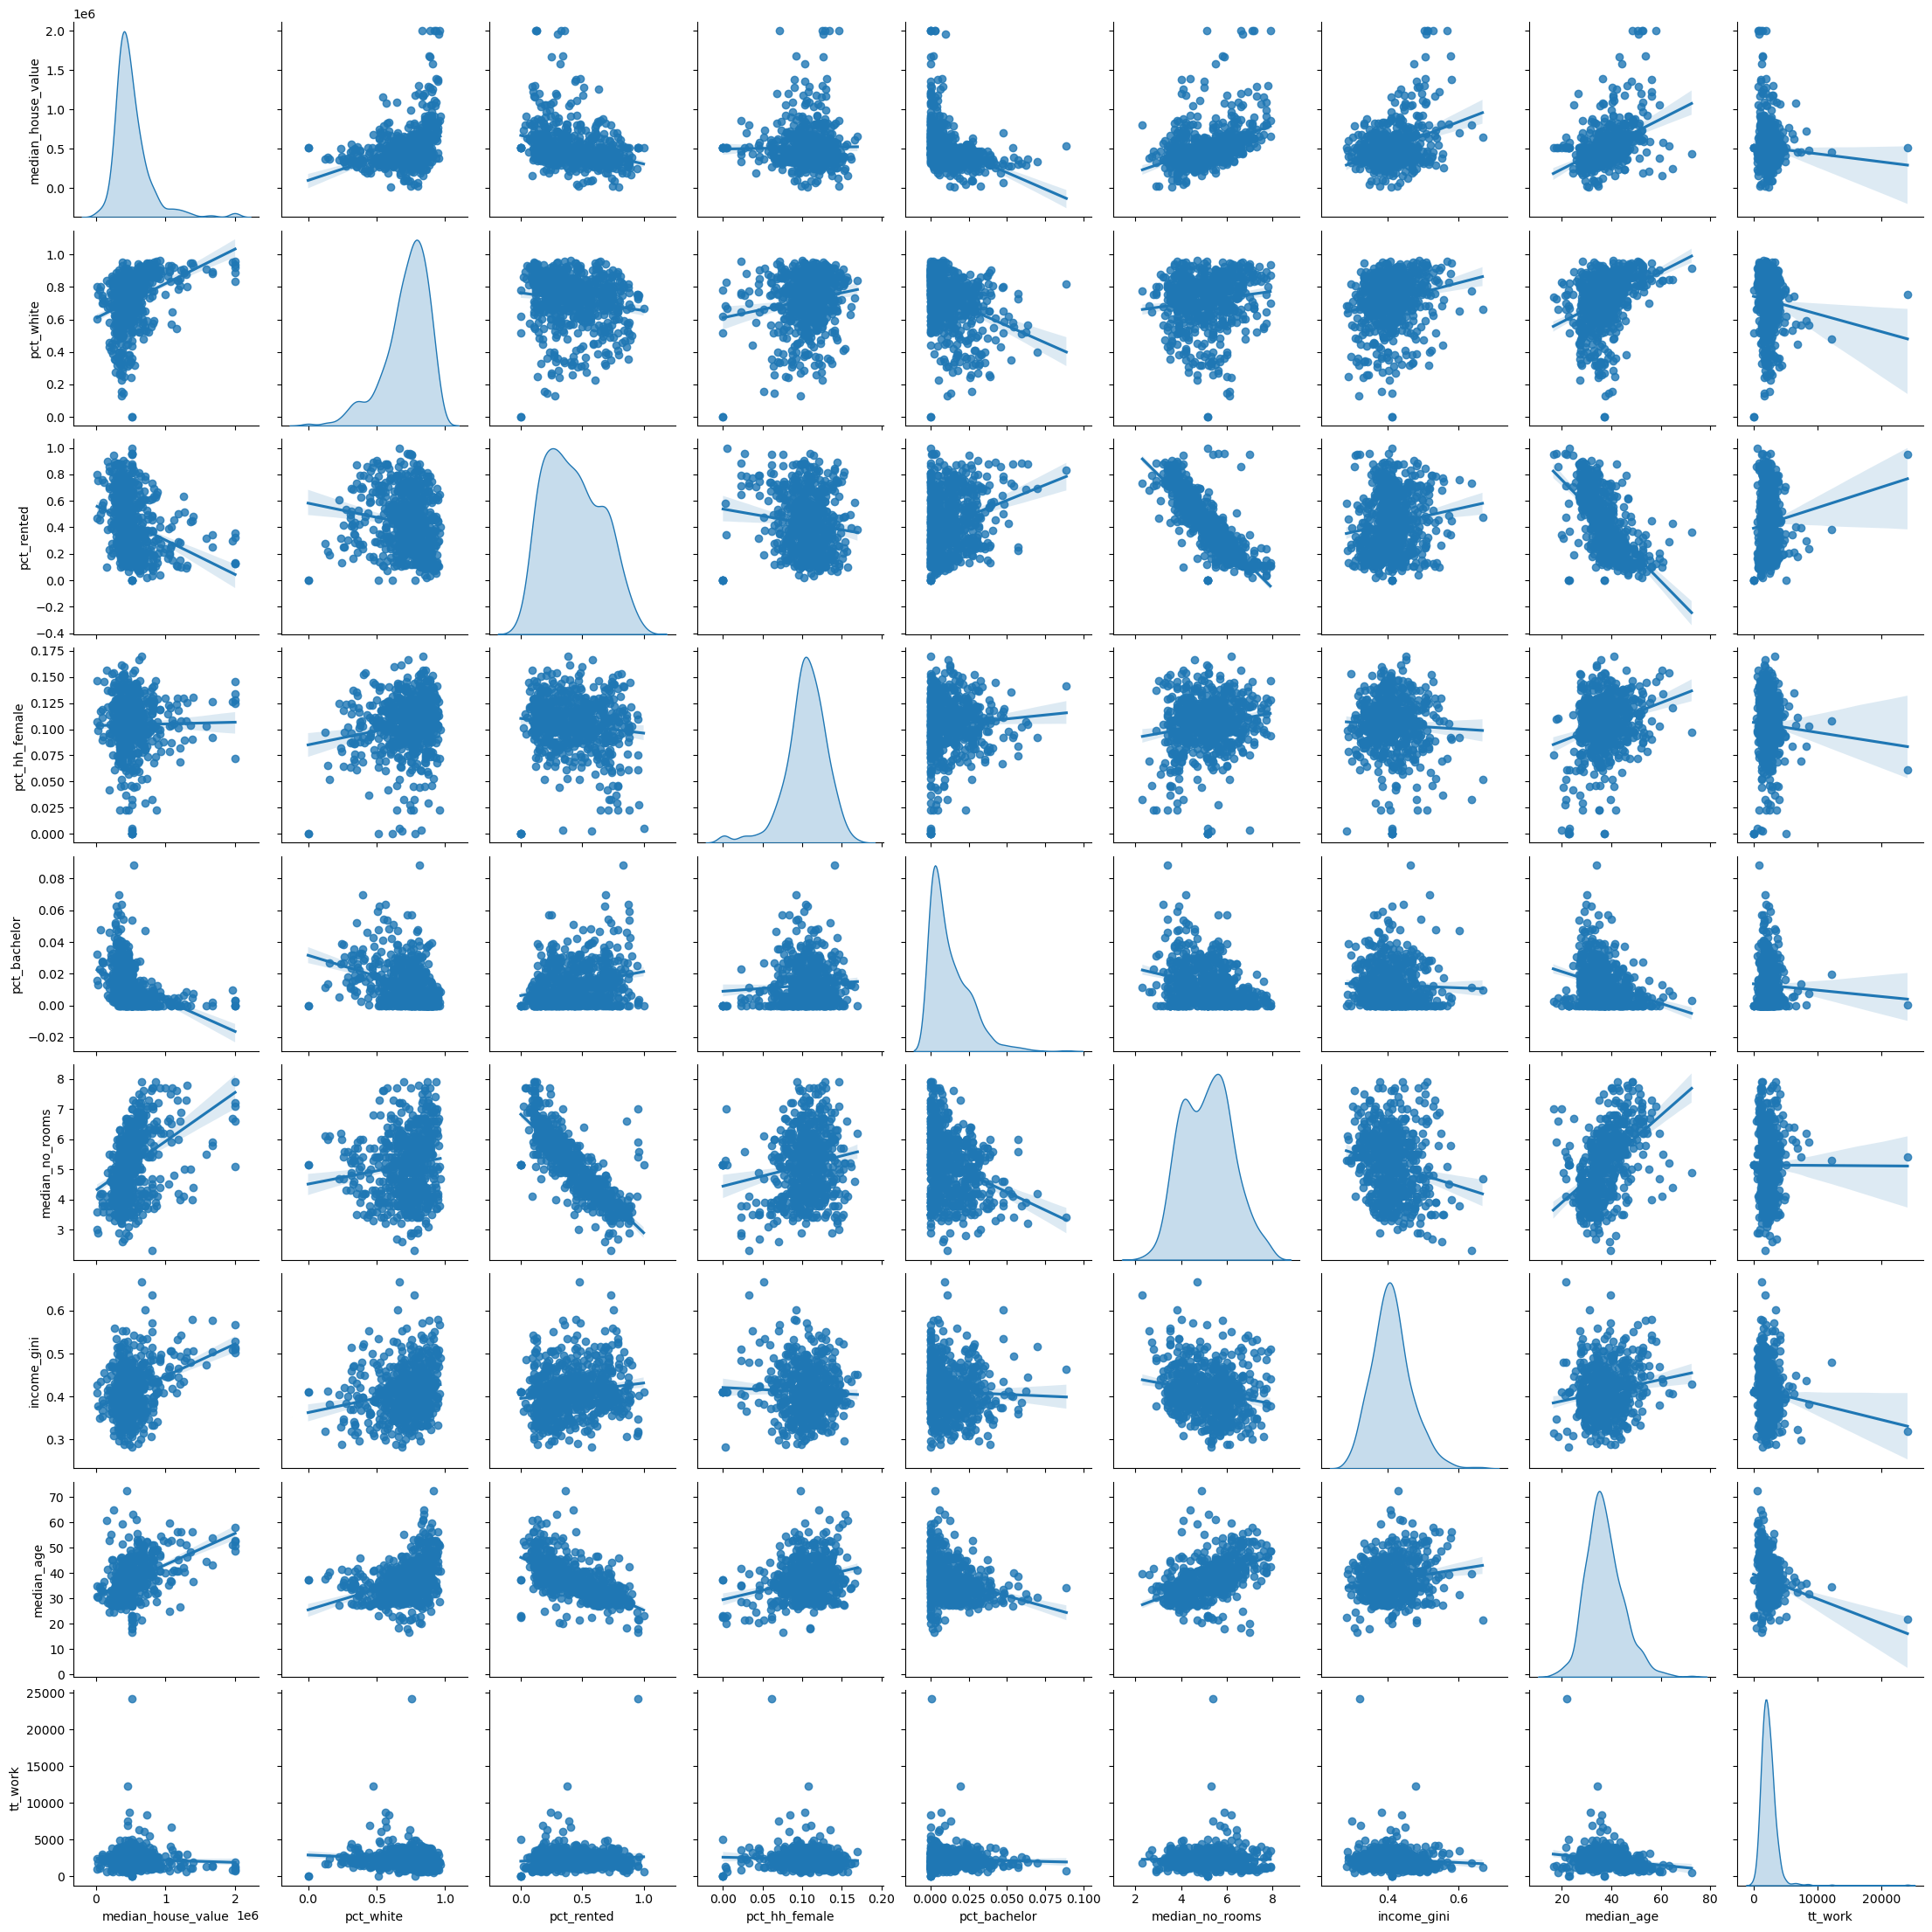

In [11]:
_ = seaborn.pairplot(
    db[cluster_variables], kind='reg', diag_kind='kde'
)

In [12]:
db[['income_gini', 'median_house_value']].head()

,income_gini,median_house_value
0,0.5355,732900.000000
1,0.4265,473800.000000
2,0.4985,930600.000000
3,0.4003,478500.000000
4,0.3196,515570.896382


In [13]:
from sklearn import metrics

In [14]:
metrics.pairwise_distances(
    db[["income_gini", "median_house_value"]].head()
).round(4)

array([[     0.    , 259100.    , 197700.    , 254400.    , 217329.1036],
       [259100.    ,      0.    , 456800.    ,   4700.    ,  41770.8964],
       [197700.    , 456800.    ,      0.    , 452100.    , 415029.1036],
       [254400.    ,   4700.    , 452100.    ,      0.    ,  37070.8964],
       [217329.1036,  41770.8964, 415029.1036,  37070.8964,      0.    ]])

In [15]:
from sklearn.preprocessing import robust_scale

In [16]:
db_scaled = robust_scale(db[cluster_variables])

In [22]:
cluster_variables

['median_house_value',
 'pct_white',
 'pct_rented',
 'pct_hh_female',
 'pct_bachelor',
 'median_no_rooms',
 'income_gini',
 'median_age',
 'tt_work']

In [23]:
metrics.pairwise_distances(
    db_scaled[:5, [0,6]]).round(4)

array([[0.    , 1.976 , 1.0012, 2.3081, 3.3925],
       [1.976 , 0.    , 2.2057, 0.397 , 1.6273],
       [1.0012, 2.2057, 0.    , 2.4106, 3.2197],
       [2.3081, 0.397 , 2.4106, 0.    , 1.2312],
       [3.3925, 1.6273, 3.2197, 1.2312, 0.    ]])

## k-means

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=5)

In [36]:
import numpy as np
np.random.seed(1234)
k5cls = kmeans.fit(db_scaled)

In [37]:
k5cls.labels_[:5]

array([2, 1, 3, 1, 4], dtype=int32)

In [38]:
k5cls.labels_.max()

4

In [39]:
k5cls.labels_.min()

0

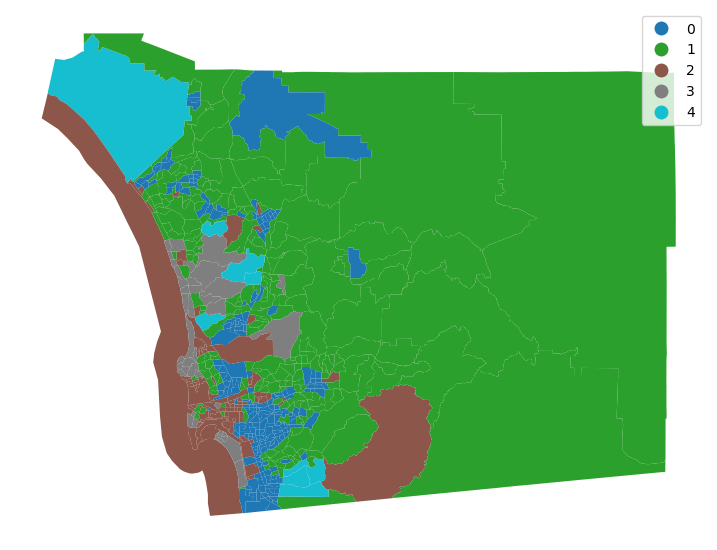

In [40]:
db['k5cls'] = k5cls.labels_
f, ax = plt.subplots(1, figsize=(9,9))
db.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax = ax)
ax.set_axis_off()
plt.show()

In [41]:
k5sizes = db.groupby("k5cls").size()
k5sizes

k5cls
0    248
1    244
2     88
3     39
4      9
dtype: int64

In [44]:
areas = db.dissolve(by='k5cls', aggfunc='sum')['area_sqm']
areas

k5cls
0     739.184478
1    8622.481814
2    1335.721492
3     315.428301
4     708.956558
Name: area_sqm, dtype: float64

In [45]:
k5means = db.groupby('k5cls')[cluster_variables].mean()

In [47]:
k5means.round(3)

,median_house_value,pct_white,pct_rented,pct_hh_female,pct_bachelor,median_no_rooms,income_gini,median_age,tt_work
k5cls,,,,,,,,,
0,356997.331,0.620,0.551,0.108,0.023,4.623,0.400,32.783,2238.883
1,538463.934,0.787,0.270,0.114,0.007,5.850,0.397,42.057,2244.320
2,544888.738,0.741,0.596,0.065,0.005,4.153,0.449,32.590,2349.511
3,1292905.256,0.874,0.275,0.109,0.002,6.100,0.488,46.356,1746.410
4,609385.655,0.583,0.377,0.095,0.007,5.800,0.391,33.500,9671.556


In [48]:
tidy_db = db.set_index('k5cls')
tidy_db  = tidy_db[cluster_variables]
tidy_db = tidy_db.stack()
tidy_db = tidy_db.reset_index()
tidy_db = tidy_db.rename( columns = {"level_1": "Attribute", 0: "Values"}
                        )
tidy_db.head()


,k5cls,Attribute,Values
0,2,median_house_value,732900.000000
1,2,pct_white,0.916988
2,2,pct_rented,0.373913
3,2,pct_hh_female,0.052896
4,2,pct_bachelor,0.000000


In [49]:
tidy_db.head(20)

,k5cls,Attribute,Values
0,2,median_house_value,732900.000000
1,2,pct_white,0.916988
2,2,pct_rented,0.373913
3,2,pct_hh_female,0.052896
4,2,pct_bachelor,0.000000
5,2,median_no_rooms,3.900000
6,2,income_gini,0.535500
7,2,median_age,37.100000
8,2,tt_work,1299.000000
9,1,median_house_value,473800.000000


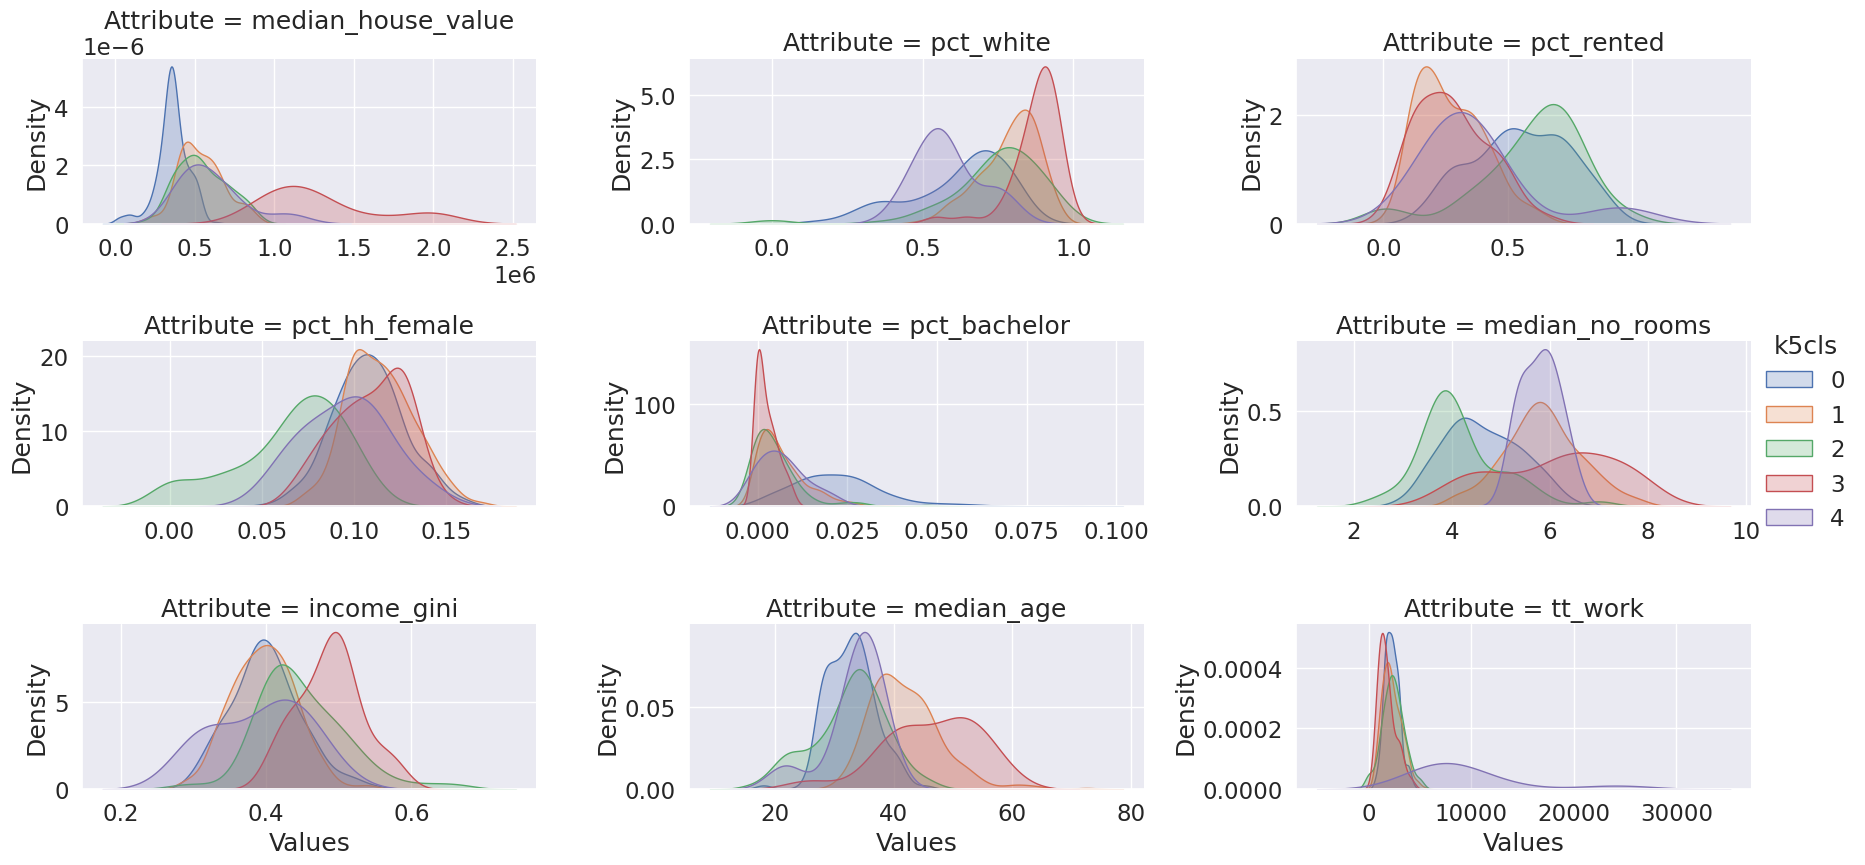

In [52]:
seaborn.set(font_scale=1.5)
facets = seaborn.FacetGrid(
    data=tidy_db,
    col='Attribute',
    hue='k5cls',
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3)

_ = facets.map(seaborn.kdeplot, 'Values', fill=True).add_legend()